## Data Science Final Project

Our research question is: Do location and advertisement price affect the overall rating of Airbnb listings in New York City, and if so, how?

We use data from: https://www.kaggle.com/datasets/vrindakallu/new-york-dataset 

## Data loading and examination

Loading the dataset and examine its contents to gain insight into its structure 

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('new_york_listings_2024.csv')

# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   name                            20758 non-null  object 
 2   host_id                         20758 non-null  int64  
 3   host_name                       20758 non-null  object 
 4   neighbourhood_group             20758 non-null  object 
 5   neighbourhood                   20758 non-null  object 
 6   latitude                        20758 non-null  float64
 7   longitude                       20758 non-null  float64
 8   room_type                       20758 non-null  object 
 9   price                           20758 non-null  float64
 10  minimum_nights                  20758 non-null  int64  
 11  number_of_reviews               20758 non-null  int64  
 12  last_review                     

In [2]:
# Show the first five rows of the DataFrame
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1312228,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,2015-12-20,0.03,1,0,0,No License,5.0,1,1,Not specified
1,45277537,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,2023-05-01,0.24,139,364,2,No License,4.67,2,1,1
2,971353993633883038,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,2023-12-18,1.67,1,343,6,Exempt,4.17,1,2,1
3,3857863,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,2023-09-17,1.38,2,363,12,No License,4.64,1,1,1
4,40896611,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,2023-12-03,0.24,133,335,3,No License,4.91,Studio,1,1


## Data cleaning

Removing duplicate rows and rows with missing values and irrelevant columns.

In [3]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Remove rows with missing values
df.dropna(inplace=True)

# Drop the irrelevant columns
df.drop(['id', 'name', 'host_id', 'host_name', 'minimum_nights', 'number_of_reviews',
         'last_review', 'reviews_per_month', 'calculated_host_listings_count',
         'availability_365', 'number_of_reviews_ltm', 'license', 'bedrooms', 'beds', 'baths',
         'room_type'],
        axis=1,
        inplace=True)

# Display the updated summary of the c
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  20758 non-null  object 
 1   neighbourhood        20758 non-null  object 
 2   latitude             20758 non-null  float64
 3   longitude            20758 non-null  float64
 4   price                20758 non-null  float64
 5   rating               20758 non-null  object 
dtypes: float64(3), object(3)
memory usage: 973.2+ KB


In [4]:
# Show the first five rows of the DataFrame
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,price,rating
0,Brooklyn,Clinton Hill,40.683710,-73.964610,55.0,5.0
1,Manhattan,Hell's Kitchen,40.766610,-73.988100,144.0,4.67
2,Manhattan,Chelsea,40.750764,-73.994605,187.0,4.17
3,Manhattan,Washington Heights,40.835600,-73.942500,120.0,4.64
4,Manhattan,Murray Hill,40.751120,-73.978600,85.0,4.91


neighbourhood_group
Manhattan        8038
Brooklyn         7719
Queens           3761
Bronx             949
Staten Island     291
Name: count, dtype: int64


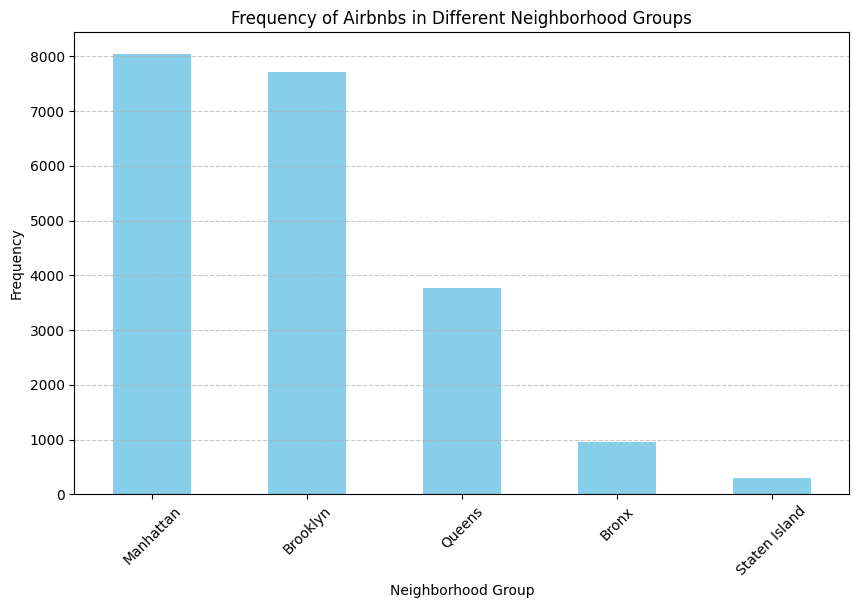

In [5]:
plt.figure(figsize=(10, 6))
neighbourhood_group_counts = df['neighbourhood_group'].value_counts()

print(neighbourhood_group_counts)

neighbourhood_group_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Airbnbs in Different Neighborhood Groups')
plt.xlabel('Neighborhood Group')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [6]:
filtered_df = df[(df['price'] >= 0) & (df['price'] <= 1000)]

total_airbnbs = df.shape[0]

# Calculate the number of Airbnbs in the $0 to $1000 price range
num_airbnbs_in_range = filtered_df.shape[0]

# Calculate the percentage
percentage_in_range = (num_airbnbs_in_range / total_airbnbs) * 100

print("Percentage of Airbnbs in the $0 to $1000 price range:", percentage_in_range, "%")

Percentage of Airbnbs in the $0 to $1000 price range: 99.19067347528664 %


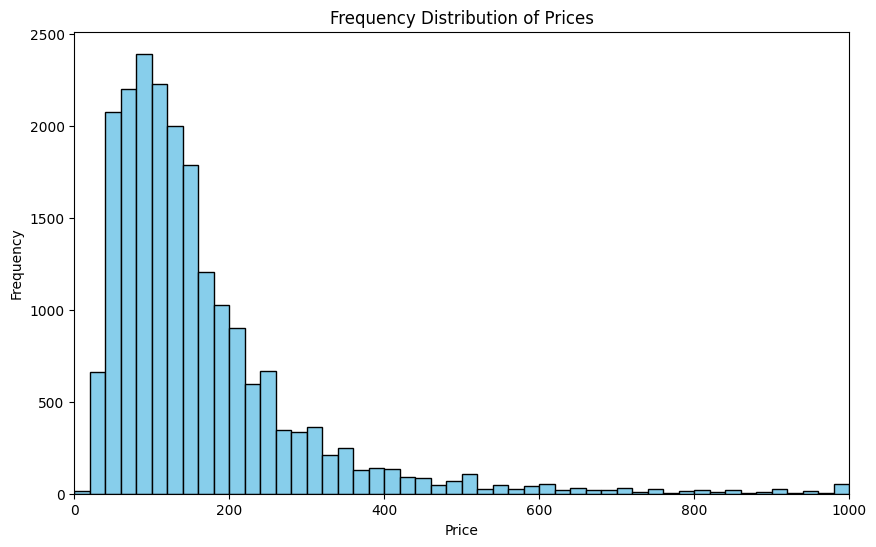

In [7]:
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create the histogram
ax.hist(df['price'], bins=50, range=(0, 1000), color='skyblue', edgecolor='black')

# Add labels and title
ax.set_xlabel('Price')
ax.set_ylabel('Frequency')
ax.set_title('Frequency Distribution of Prices')

# Set the x-axis limit
ax.set_xlim(0, 1000)

# Show the plot
plt.show()

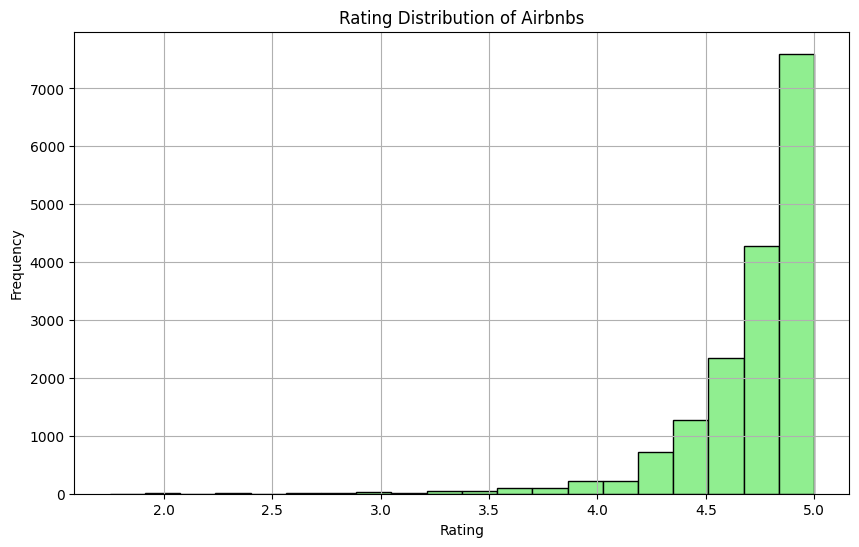

In [8]:
# Filter out unexpected values from the 'rating' column
filtered_df = df[~df['rating'].isin(['No rating', 'New '])]

# Convert rating column to float (assuming it's stored as strings)
filtered_df.loc[:, 'rating'] = filtered_df['rating'].astype(float)

# Rating Histogram with Custom Bins Range
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['rating'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Rating Distribution of Airbnbs')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

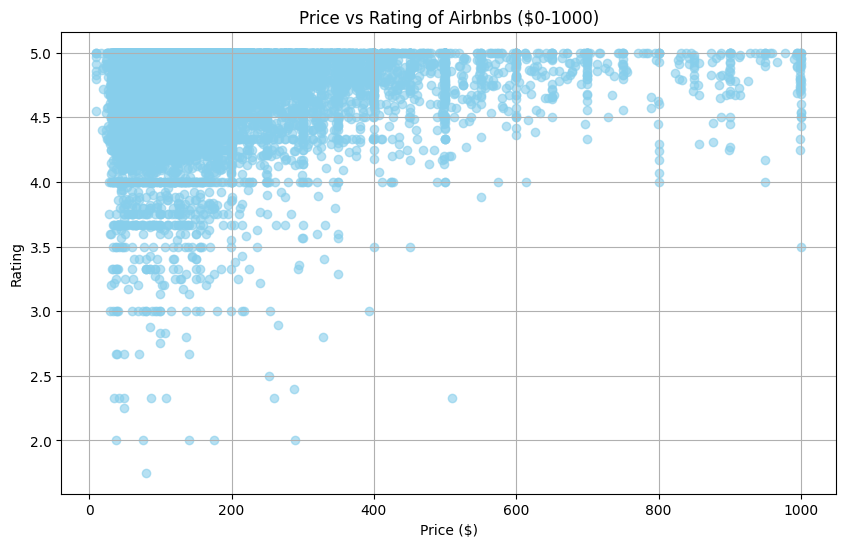

In [9]:

# Filter out price values not in the range 0 - 1000 and unexpected rating values
filtered_df = df[(df['price'] >= 0) & (df['price'] <= 1000) & (~df['rating'].isin(['No rating', 'New ']))]

# Convert rating column to float (assuming it's stored as strings)
filtered_df.loc[:, 'rating'] = filtered_df['rating'].astype(float)

# Scatter plot of Price vs Rating
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['price'], filtered_df['rating'], color='skyblue', alpha=0.6)
plt.title('Price vs Rating of Airbnbs ($0-1000)')
plt.xlabel('Price ($)')
plt.ylabel('Rating')
plt.grid(True)
plt.show()


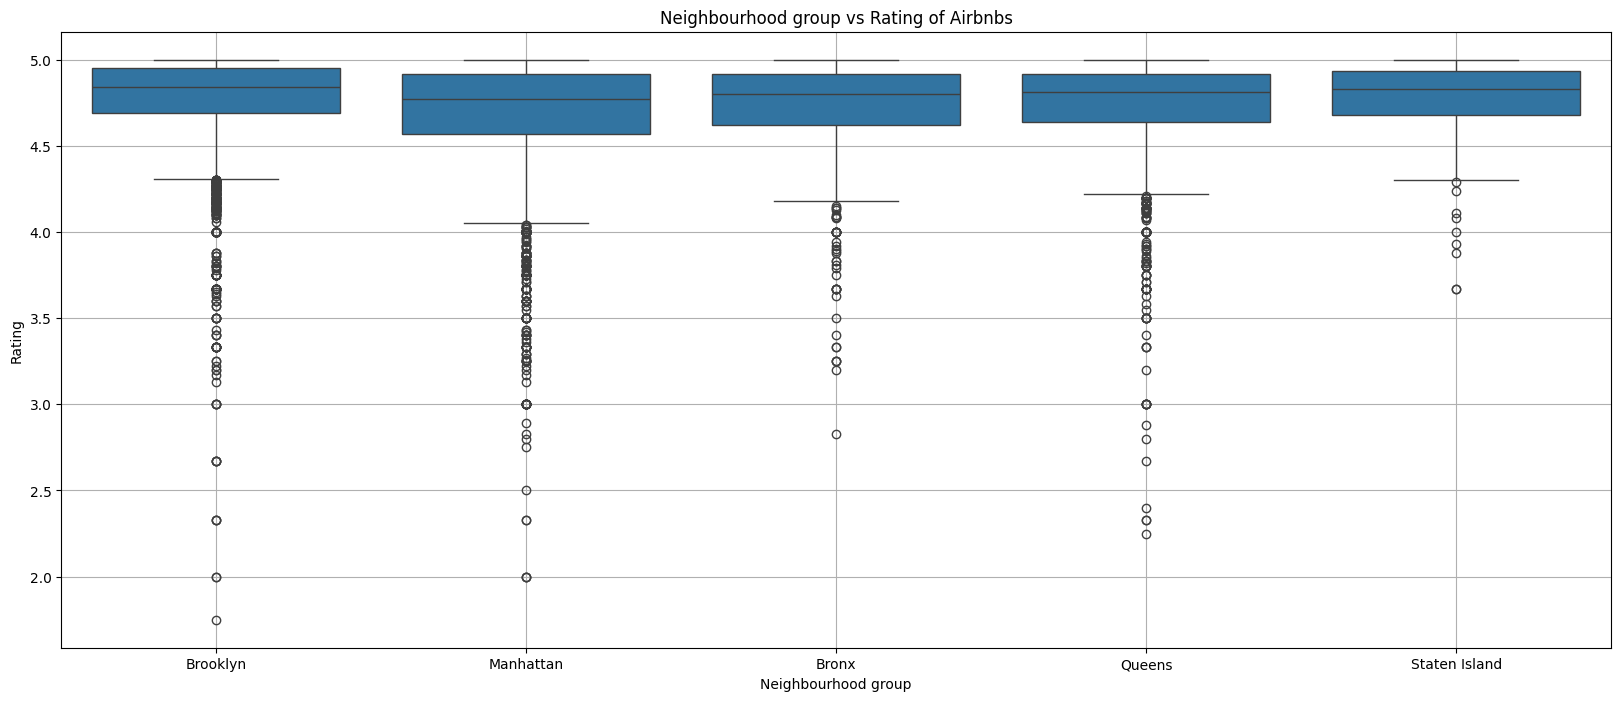

In [10]:
# Filter out unexpected rating values
filtered_df = df[~df['rating'].isin(['No rating', 'New '])]

# Convert rating column to float (assuming it's stored as strings)
filtered_df.loc[:, 'rating'] = filtered_df['rating'].astype(float)

# Box plot of Neighbourhood group vs Rating
plt.figure(figsize=(20, 8))
sns.boxplot(data=filtered_df, x='neighbourhood_group', y='rating')
plt.title('Neighbourhood group vs Rating of Airbnbs')
plt.xlabel('Neighbourhood group')
plt.ylabel('Rating')  
plt.grid(True)
plt.show()



## Analysis

Our analysis shows that most of the Airbnb listings in New York City are in Manhattan and Brooklyn, accounting for approximately 76% of all the listings. This shows the popularity of these two areas among hosts and potential guests. In comparison, Staten Island has the lowest amount of listings, with just 291 listings.

Furthermore, our analysis shows that nearly all (99.19%) of Airbnb listings in New York City are priced between \\$0 and \\$1,000. While most of the listings are in the \\$0 to \\$200 range, we found two outliers listed for \\$100,000. To ensure a high quality of our results, we chose to exclude these extreme outliers from the analysis. Our analysis also indicates that a significant majority of Airbnb listings in our dataset are rated with 4.5 stars or higher.

When considering ratings, our analysis shows a clear trend: as Airbnb's price rises, so does its rating. Mainly, lower ratings are associated with listings priced between \\$0 and \\$400. However, starting at \\$600, ratings are always at or above 4 stars, with only one exception, a \\$1,000 listing with 3.5 stars. These results strongly suggest that price has a huge influence on an Airbnb's rating.

At last, our analysis shows that, on average, ratings are fairly consistent across different neighborhoods, with Staten Island having the highest average rating. Despite Staten Island having the lowest number of listings, all neighbourhoods exhibit a similar average rating. This suggests that location has minimal influence, if any, on the ratings of Airbnb listings.

## Insight

The Analysis of New York City's Airbnb listings offers insightful information on the correlation between advertisement price, location, and total ratings. Manhattan and Brooklyn dominate in terms of listing concentration, indicating the popularity of these areas among both hosts and guests. On the other hand, Staten Island has remarkably fewer listings, implying that it might not be as popular as other locations for Airbnb stays. 

But the influence of location on ratings is overshadowed by the impact of pricing. There is a clear pattern that higher-priced accommodations typically get higher ratings. This implies that visitors believe higher-priced accommodations to be of higher caliber or value. There also appears to be a correlation between lower ratings and lower-priced listings. All listings with less then 4 stars were below \\$600.

Finally, although average evaluations range somewhat throughout neighborhoods, these variances are minimal. Even though Staten Island has the highest average rating, all neighborhoods have comparable average ratings. This implies that in contrast to popular belief, location has zero to none bearing on how highly people rate Airbnb rentals in New York City.

## Discussion

The results indicate that, while to varying levels, location and price have an impact on how highly people rate Airbnb rentals in New York City. Given the connection between higher ratings and higher prices, it is possible that visitors will view more-priced items as offering better quality or value. Also a possibility is that guests have a bit of bias towards expensive accommodations, this makes sense given the way that people interpret a high price as a symbol of quality.

Despite this, it seems that location has less of an effect on ratings. The average ratings do differ throughout neigborhoods, but not to the extent that would indicate a clear causal link between ratings and location. The idea that guests' opinions of Airbnb accomodations are significantly influenced by how popular an area is, is called into question.

Lastly, Manhattan and Brooklyn appear to have a higher concentration of listings than other places due to the presence of facilities, services and tourist attractions. These reasons might contribute to the overall appeal of these areas for Airbnb stays. On the contrary, Staten Island has by far the least listings; which could possibly be due to things like less well-known sights.

## Conclusion

The project concludes that, although they have different effects, location and price can both have an impact on the overall rating of Airbnb accomodations in New York City. The impact of location on ratings appear to be little, even though higher prices tend to correlate with higher ratings. 

The results of this project have relevance for both Airbnb hosts and guests. In order to meet the expectations and sense of value that guests have, hosts should think about modifying their pricing tactics. Additionally, while hosts still value location highly, a listings rating succes might depend on factors other than its location.

In summary, the project gives significant perspectives on the elements influencing the New York City Airbnb market and establishes a foundation for further investigation into the dynamics of price, location and guest contenment within the Airbnb sector. 